# Python Demo -- Layth Aljorani

## One Simulation

### Create points

In [4]:
import numpy as np

Under module **np.random**:
- rand() returns a single random number
- rand(n) returns n random numbers

In [12]:
DIM = 2 # points are two dimensional

p1 = np.random.rand(DIM)
p2 = np.random.rand(DIM)

In [24]:
p1

array([0.84349872, 0.73618739])

In [16]:
p2

array([0.45549437, 0.63295072])

### Measure Distance

Under module **np.linalg**:
- norm(p) returns the Euclidean length of the vector p
- norm(p1-p2) returns the Euclidean distance between the two points

In [35]:
d = np.linalg.norm(p1 - p2)
d

0.40150365417748346

### Visualize

In [39]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


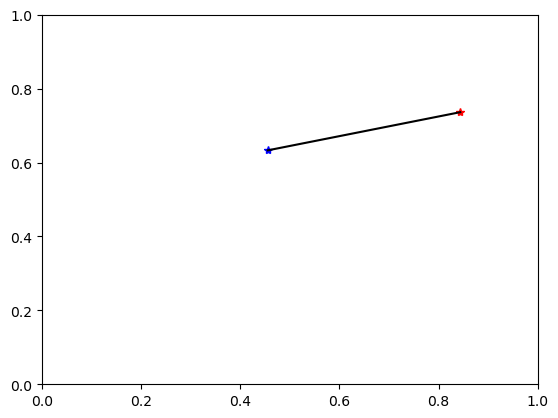

In [65]:
plt.plot(p1[0], p1[1], 'r*') # red star
plt.plot(p2[0], p2[1], 'b*') # blue star
plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k-') # line
plt.axis([0,1,0,1]) # [xmin, xmax, ymin, ymax]
plt.show()

## Many Simulations

In [73]:
avg: int = 0
n = 10
for test in range(n):
    # init points
    p1 = np.random.rand(2)
    p2 = np.random.rand(2)
    # measure distance
    d = np.linalg.norm(p1 - p2)
    avg += d
    
avg /= n
print(avg)

0.44771418936330765


### Let's use arrays instead of for loops

In [80]:
np.random.rand(2, 10) # example array

array([[0.78811257, 0.80486314, 0.45592381, 0.25426942, 0.75195953,
        0.73845527, 0.06908519, 0.69766266, 0.0213907 , 0.15374811],
       [0.11381868, 0.43581105, 0.85293752, 0.5465541 , 0.79285926,
        0.14497925, 0.20224561, 0.37946163, 0.59387053, 0.08558776]])

In [82]:
n = 10
p1 = np.random.rand(2, n)
p2 = np.random.rand(2, n)
d = np.linalg.norm(p1 - p2, axis = 0) # specify axis !
avg = np.mean(d)
print(avg)

0.46131880008118237


### Timing Comparisons

In [88]:
def sim_many(n: int):
    avg = 0.0
    for test in range(n):
        # init points
        p1 = np.random.rand(2)
        p2 = np.random.rand(2)
        # measure distance
        d = np.linalg.norm(p1 - p2)
        avg += d
    
    avg /= n
    return avg

In [96]:
def sim_vector(n: int):
    p1 = np.random.rand(2, n)
    p2 = np.random.rand(2, n)
    d = np.linalg.norm(p1 - p2, axis = 0) # specify axis !
    avg = np.mean(d)
    return avg

In [106]:
from time import time
print(time())
print(time)

1692762152.7311344
<built-in function time>


In [117]:
for logn in range(1, 7):
    n = 10 ** logn
    print(f"{n}: ", end='')
    
    t = time()
    sim_many(n)
    t = time() - t
    print(f"Loops method @ {t:.4f} seconds, ", end='')
    
    t = time()
    sim_vector(n)
    t = time() - t
    print(f"Vectorized method @ {t:.4f} seconds")

10: Loops method @ 0.0012 seconds, Vectorized method @ 0.0001 seconds
100: Loops method @ 0.0006 seconds, Vectorized method @ 0.0001 seconds
1000: Loops method @ 0.0067 seconds, Vectorized method @ 0.0001 seconds
10000: Loops method @ 0.0534 seconds, Vectorized method @ 0.0007 seconds
100000: Loops method @ 0.5160 seconds, Vectorized method @ 0.0077 seconds
1000000: Loops method @ 5.0593 seconds, Vectorized method @ 0.0605 seconds


### Convergence

In [121]:
avg_old = 0.0
for logn in range(1, 7):
    n = 10 ** logn
    avg = sim_vector(n)
    print(f"{n}: {avg}, {avg - avg_old}")
    avg_old = avg

    # we are basically getting less and less off from the real theoretical average

10: 0.5119454972249681, 0.5119454972249681
100: 0.5537436413420099, 0.04179814411704186
1000: 0.5340388474814631, -0.0197047938605468
10000: 0.5204133307261505, -0.01362551675531265
100000: 0.521443270207492, 0.0010299394813415574
1000000: 0.5215006695000147, 5.7399292522686274e-05


### Histogram

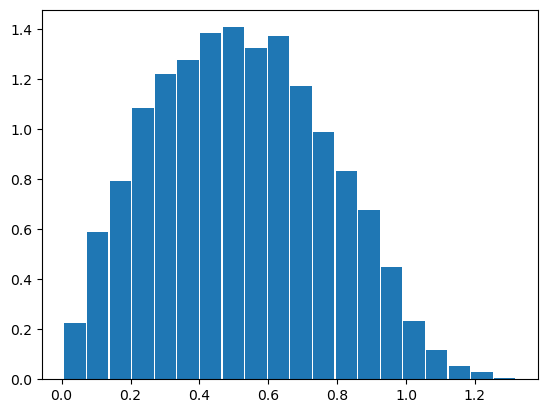

In [151]:
n = 10000
p1 = np.random.rand(2, n)
p2 = np.random.rand(2, n)
d = np.linalg.norm(p1 - p2, axis=0)

# rwidth: width of the bins
plt.hist(d, bins=20, rwidth=0.95, density=True)
plt.show()

### Compare exact vs observed PDF

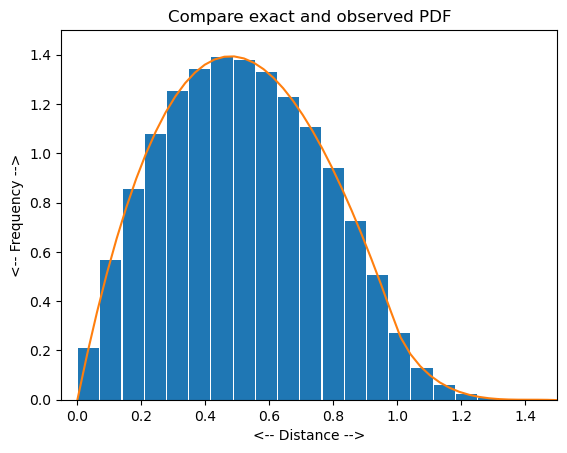

In [199]:
import math

def f(d):
    if isinstance(d, np.ndarray):
        result = np.zeros(d.shape)
        mask = d <= 1.0
        result[mask] = 2 * d[mask] * ((d[mask]**2) - (4 * d[mask]) + math.pi)
        result[~mask] = 2 * d[~mask] * ((4 * np.sqrt((d[~mask]**2) - 1.0)) - ((d[~mask]**2) + 2 - math.pi) - (4 * np.arctan(np.sqrt((d[~mask]**2) - 1))))
        return result
    else:
        if d <= 1.0: return (2*d)((d**2) - (4*d) + math.pi)
        else: return (2*d)((4 * math.sqrt((d**2) - 1.0)) - ((d**2) + 2 - math.pi) - (4 * math.atan(math.sqrt((d**2) - 1))))

# Run Sim
n = 1000000 # million runs
p1 = np.random.rand(2, n)
p2 = np.random.rand(2, n)
d = np.linalg.norm(p1 - p2, axis=0)

# plot histogram
plt.hist(d, bins=20, rwidth=0.95, density=True)

# plot function
x = np.linspace(0,1.5)
plt.plot(x, f(x))

# house keeping
plt.axis([-.05,1.5,0,1.5])
plt.title('Compare exact and observed PDF')
plt.xlabel("<-- Distance -->")
plt.ylabel("<-- Frequency -->")
plt.show()

In [202]:
!pip install nbconvert

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [213]:
!jupyter nbconvert --to pdf 'HW1.ipynb'

[NbConvertApp] Converting notebook HW1.ipynb to pdf
[NbConvertApp] Support files will be in HW1_files/
[NbConvertApp] Making directory ./HW1_files
[NbConvertApp] Making directory ./HW1_files
[NbConvertApp] Making directory ./HW1_files
[NbConvertApp] Writing 46606 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 95182 bytes to HW1.pdf
